In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm

import statsmodels.api as sm

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, accuracy_score, mean_squared_error, log_loss
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from scipy.stats import chi2_contingency

# Question 1 

### (a)
Loading the *male_stud.csv* as a pandas DataFrame:

In [2]:
male = pd.read_csv('male_stud.csv')

### (b)
Data Inspection:

In [5]:
male.shape

(187, 14)

There are 187 students in this dataset. There are 14 different indicators. Here is a brief summary of each indicator:

- large_fam - family size (binary: "0" - less or equal to 3 or "1" - greater than 3)

- lives_in_city - student's residence type (binary: "1" - urban area or "0" - rural area)

- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

- failures - number of past class failures (numeric: n if 1<=n<3, else 4)

- paid - extra paid classes within the course subject (binary: yes or no)

- activities - extra-curricular activities (binary: yes or no)

- internet - Internet access at home (binary: yes or no)

- romantic - with a romantic relationship (binary: yes or no)

- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

- freetime - free time after school (numeric: from 1 - very low to 5 - very high)

- goout - going out with friends (numeric: from 1 - very low to 5 - very high)

- absences - number of school absences (numeric: from 0 to 93)

- final_grade (numeric: from 0 to 20, output target)


Check missing values:

In [6]:
male.isna().sum()

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64

There are no missing values in the dataset.

### (c)
Exploratory Data Analysis:

First, let's create a function to summarise each column. It will use the pandas method *.describe()* to create a table with numerical summaries, as well as plotting a histogram for a graphical summary. I also included box plots for numerical indicators.

In [542]:
def summary(df, col):
    print(df[col].describe())
#     df.hist(column=col, figsize=(5,3))
    fig, ax = plt.subplots(figsize=(5,3))
    if col=='final_grade':
        sns.histplot(data = df, x=col, ax=ax, stat='probability', alpha=1, bins=20)
    else: 
        sns.histplot(data = df, x=col, ax=ax, stat='probability', alpha=1)

    plt.title(f"Histogram of {col.capitalize()}")
    ax.set_yticks([i / 10 for i in range(11)])

    ax.set_axisbelow(True)
    
    # Add grid lines
    ax.grid(alpha=0.5, linestyle="-.")
    plt.tight_layout()

    plt.show()

count    187.000000
mean       0.668449
std        0.472034
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: large_family, dtype: float64


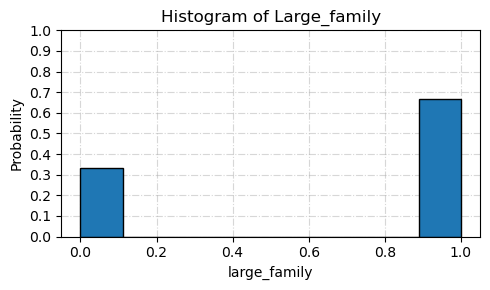

In [9]:
summary(male, 'large_family')

The count for the *large_family* column is 187, i.e. there are no missing values. We can see that a majority of male students have large families (greater than 3), as the mean is 0.6684. This indicates that 66.84% of male students have a large family. The median and mode are both 1, i.e. having a large family. 

count    187.000000
mean       0.764706
std        0.425321
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: lives_in_city, dtype: float64


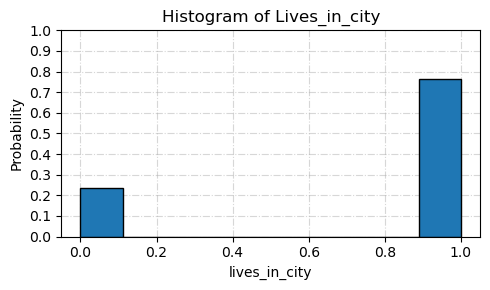

In [10]:
summary(male, 'lives_in_city')

The count for the *lives_in_city* column is 187, i.e. there are no missing values. We can see that a majority of male students live in urban areas, as the mean is 0.7657. This indicates that 76.57% of male students live in urban areas, and just under 25% live in rural areas. The median and mode are both 1, i.e. living in an urban area. 

count    187.000000
mean       1.491979
std        0.750405
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


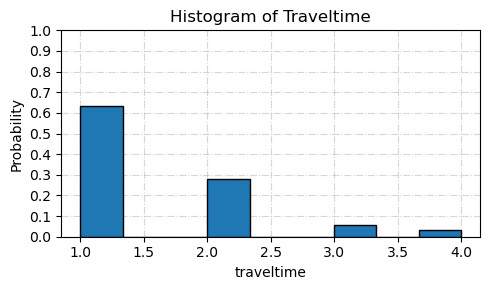

In [11]:
summary(male, 'traveltime')

The count for the *travel_time* column is 187, i.e. there are no missing values. We can see that the modal *traveltime* value is 1, i.e. less than 15 mins, with over 60% of male students having this value. A little less than 30% of students have value 2, and have travel time of 15-30 minutes. Lastly then, values 3 and 4 are attributed to less male students, and represent travel times of 30 minutes to 1 hour, and greater than 1 hour, respectively. We can see from the 75th percentile that 75% of male students have travel time less than or equal to an hour. 

count    187.000000
mean       1.764706
std        0.808713
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


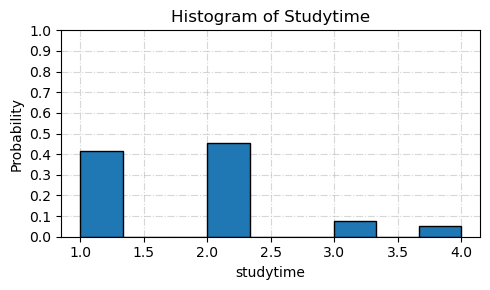

In [12]:
summary(male, 'studytime')

The count for the *studytime* column is 187, i.e. there are no missing values. We can see that the modal weekly study time value is 2, i.e. 2 to 2 and a half hours per week, with over 40% of male students having this value. A little less than 40% of students have value 1, and have a weekly study time of less than 2 hours. Finally, values 3 and 4 have less students, and represent weekly study times of 5 to 10 hours, and greater than 10 hours, respectively. We can see from the 75th percentile that 75% of students study less than or equal to 5 hours per week. 

count    187.000000
mean       0.368984
std        0.788152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


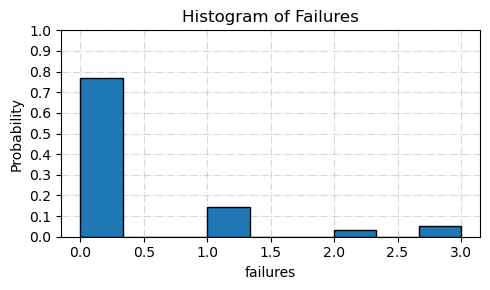

In [13]:
summary(male, 'failures')

The count for the *failures* column is 187, i.e. there are no missing values. We can see that the modal *failures* value is 0, i.e. no previous past class failures, with almost 80% of male students having this value. Roughly 15% of male students have value 1, and have previously failed one class. Values 2 and 3 represent male students who have previously failed 2 or 3 classes, respectively, and contain a very small percentage of the sample.  

count    187.000000
mean       0.390374
std        0.489144
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: paid, dtype: float64


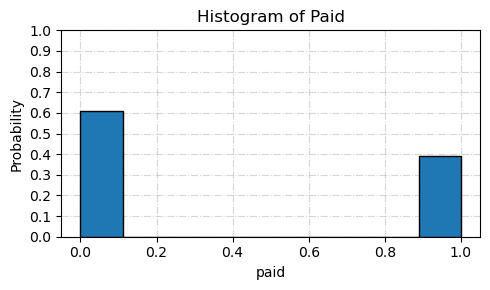

In [14]:
summary(male, 'paid')

The count for the *paid* column is 187, i.e. there are no missing values. We can see that the modal *paid* value is 0, i.e. students who have not taken extra paid classes within the course subject, with roughly 60% of male students in having this value. The other 40% of male students have taken extra paid classes within the course subject.

count    187.000000
mean       0.561497
std        0.497536
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64


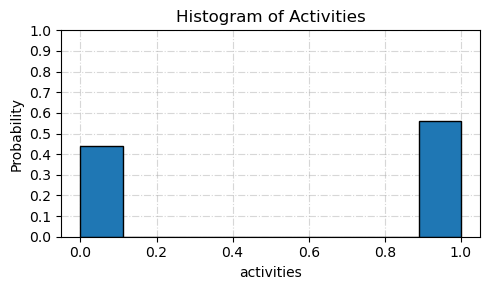

In [15]:
summary(male, 'activities')

The count for the *activities* column is 187, i.e. there are no missing values. We can see that the modal *activities* value is 1, i.e. students who partake in extra-curricular activities, with around 55% of male students having this value. The rest of the male students, roughly 45%, do not partake in extra-curricular activities. 

count    187.000000
mean       0.850267
std        0.357767
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64


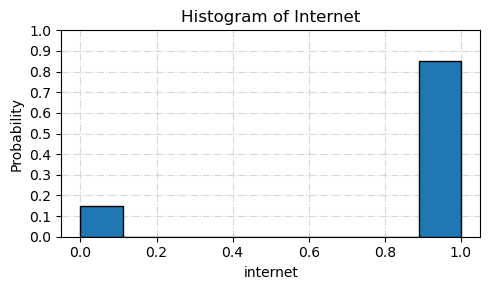

In [16]:
summary(male, 'internet')

The count for the *internet* column is 187, i.e. there are no missing values. We can see that the modal *internet* value is 1, i.e. male students who do have internet access at home, with roughly 85% of male students having this value. Roughly 15% of male students have a value of 0, and do not have internet access at home.

count    187.000000
mean       0.283422
std        0.451870
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64


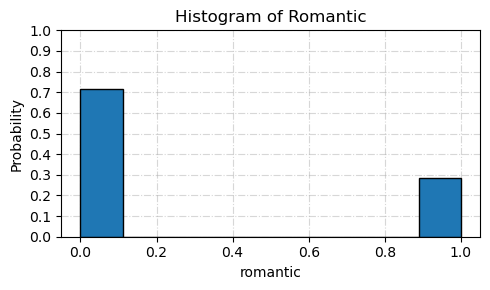

In [17]:
summary(male, 'romantic')

The count for the *romantic* column is 187, i.e. there are no missing values. We can see that the modal *romantic* value is 0, i.e. male students who are not in a romantic relationship, with a little over 75% of male students having this value. Just under 30% of male students are have value 1 for romantic, and are in a romantic relationship.

count    187.000000
mean       4.000000
std        0.898027
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


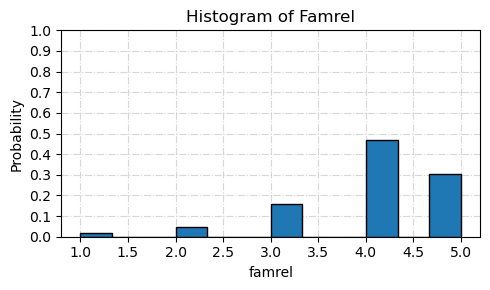

In [18]:
summary(male, 'famrel')

The count for the *famrel* column is 187, i.e. there are no missing values. We can see that the modal *famrel* value is 4, i.e. male students with a family relationship rated 4 out of 5, with almost 50% of male students having this value. Roughly 30% of male students have value 5, and have a family relationship rated as "excellent". The other roughly 20% of male students have a family relationship rated 1-3, with lower ratings being less likely. 

count    187.000000
mean       3.486631
std        1.001924
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


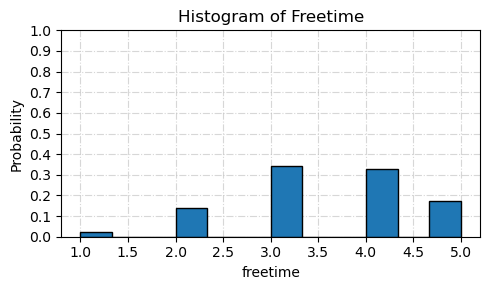

In [19]:
summary(male, 'freetime')

The count for the *freetime* column is 187, i.e. there are no missing values. We can see that the modal *freetime* value is 3, i.e. students with freetime after school rated as 3 out of 5, with roughly 35% of male students having this value. Slightly less students have value 4, with free time after school rated as 4 out of 5. Close to zero students have freetime rated as 1 out of 5, close to 15% of male students have free time rated as 2 out of 5, and finally, almost 20% of students have freetime rated as 5 out of 5. The median value being 3 indicates that 50% of students have free time after school rated as 3 out of 5 or less.

count    187.000000
mean       3.197861
std        1.135164
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


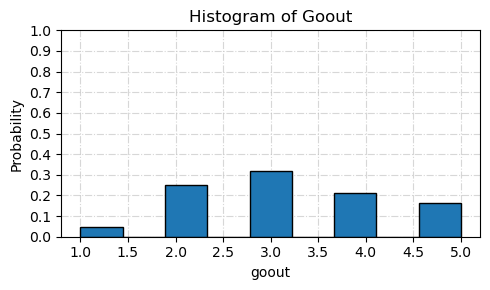

In [20]:
summary(male, 'goout')

The count for the *goout* column is 187, i.e. there are no missing values. We can see that the modal *goout* value is 3, i.e. students with going out with friends rated as 3 out of 5, with just over 30% of male students having this value. Slightly less students have value 2, with going out with friends rated as 2 out of 5. Roughly 5% of male students have going with friends rated as 1 out of 5, close to 20% of male students have going out with friends rated as 4 out of 5, and finally, under 20% of students have freetime rated as 5 out of 5. The median value being 3 indicates that 50% of students have free time after school rated as 3 out of 5 or less.

count    187.000000
mean       5.144385
std        5.980749
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       38.000000
Name: absences, dtype: float64


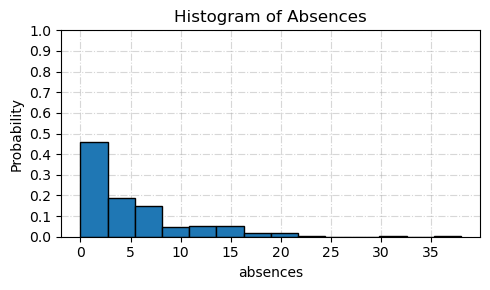

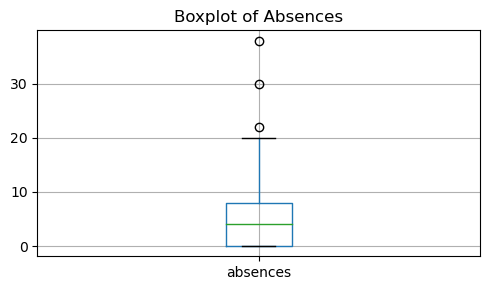

In [21]:
summary(male, 'absences')
fig, ax = plt.subplots(figsize=(5,3))
male.boxplot(column='absences', ax=ax)
plt.title('Boxplot of Absences')
plt.tight_layout()
plt.show()

The count for the *absences* column is 187, i.e. there are no missing values. We can see that the *absences* column has a distribution with positive skew (mean is greater than the median). The median number of absences is 4, i.e. 50% of male students have had less than or equal to 4 absences. The 1st quartile is zero, which indicates that at least one quarter of male students have had no absences. The third quartile is 8, meaning that 75% of male students have had less than or equal to 8 absences. Finally, we do see some outliers for this indicator. There are several points which lie outside the third quartile plus 1.5 times the interquartile range. The maximum number of absences for a male student was 38. 

count    187.000000
mean      10.914439
std        4.495297
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64


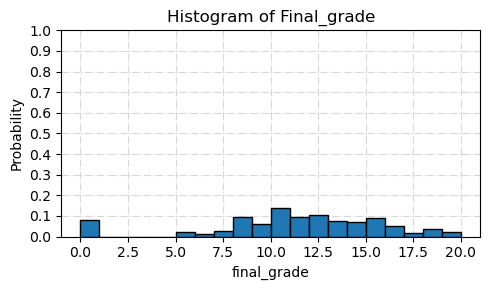

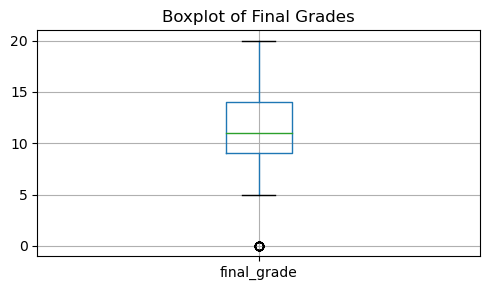

In [543]:
summary(male, 'final_grade')
fig, ax = plt.subplots(figsize=(5,3))
male.boxplot(column='final_grade', ax=ax)
plt.title('Boxplot of Final Grades')
plt.tight_layout()
plt.show()

The count for the *final_grades* column is 187, i.e. there are no missing values. We can see that the final grades generally lie between 5 and 20. The median final grade is 11, i.e. 50% of male students had a final grade less than or equal to 11. The 1st quartile is 9, which indicates that at least one quarter of male students had a final grade of less than or equal to 9. The third quartile is at 14, meaning that 75% of male students had final grades less than or equal to 14. Finally, we do see some outliers for this indicator. There is more than one male student who received a final grade of 0, which lies outside the first quartile minus 1.5 times the interquartile range. The maximum final grade received for a male student was 20. 

# Question 2

### (a)
Loading the *female_stud.csv* dataset into Python as a pandas DataFrame

In [3]:
female = pd.read_csv('female_stud.csv')

In [24]:
female.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10


### (b)
Inspecting the data

In [25]:
female.shape

(208, 14)

There are 208 students in the *female_stud.csv* dataset, and also 14 indicator variables. Let's check if the columns match the *male_stud.csv* dataset:

In [26]:
female.columns.to_list() == male.columns.to_list()

True

We can see that both the *male_stud.csv* and *female_stud.csv* datasets both share the exact same columns, i.e. they have the same indicators. 

### (c)

Next, I will perform t-tests for each indicator to see if there is a meaningful difference in the indicators between the male and female datasets. The function below runs a t-test for the same column/indicator in the two different DataFrames. It then prints the results, including the t-score and p-value associated with the rest, as well as whether or not $H_0$ is rejected for $\alpha=0.01$: 

In [27]:
def t_test(df1, df2, col):
    # get the specified columns from the datasets
    col1 = df1[col]
    col2 = df2[col]

    # perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(col1, col2, equal_var=False)

    # print the t-score and p-value for the t-test
    print(f"T-test for {col}:")
    print(f"T-score: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # interpret the results based on the significance level
    alpha = 0.01
    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis")
        print("There is significant evidence to suggest that there is a difference in the means of male and female groups.\n\n")

    else:
        print("Conclusion: Fail to reject the null hypothesis")
        print("There is not enough evidence to suggest a significant difference in the means of male and female groups.\n\n")



Now, let's loop through the columns and run the t-test for each column:

In [28]:
for col in male.columns.to_list():
    t_test(male, female, col)

T-test for large_family:
T-score: -1.7807
P-value: 0.0758
Conclusion: Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in the means of male and female groups.


T-test for lives_in_city:
T-score: -0.5642
P-value: 0.5730
Conclusion: Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in the means of male and female groups.


T-test for traveltime:
T-score: 1.1766
P-value: 0.2401
Conclusion: Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in the means of male and female groups.


T-test for studytime:
T-score: -6.3709
P-value: 0.0000
Conclusion: Reject the null hypothesis
There is significant evidence to suggest that there is a difference in the means of male and female groups.


T-test for failures:
T-score: 0.8764
P-value: 0.3814
Conclusion: Fail to reject the null hypothesis
There is not enough evidence to suggest a significant differen

After conducting the two-sample t-tests, we see that only for the indicators *studytime* and *freetime* there was a significant enough difference to reject the null hypothesis. For all other columns, there was not sufficient evidence to suggest a significant difference at the 1% level. However, it is worth noting that for the indicators *paid, activities, romantic* and *final_grade*, if we had set $\alpha = 0.05$, we would have rejected the null hypothesis. 


To conclude the results of these tests, I found that there is a significant difference in the amount of weekly study time and free time after school for male and female students. I also found less significant differences in whether extra paid classes are taken, whether or not a student does extracurricular activities, whether or not a student is in a romantic relationship and finally in the final grade achieved by the student.

# Question 3

### (a)
I can combine the male and female DataFrames together using the *pd.concat()* method:

In [238]:
full = pd.concat([male, female]).reset_index(drop=True)

In [239]:
full

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8


### (b)
The pandas method *.corr()* creates a DataFrame of the correlation matrix between columns, using Pearson correlation by default. I can visualise this nicely with the *sns.heatmap()* function:

<AxesSubplot:>

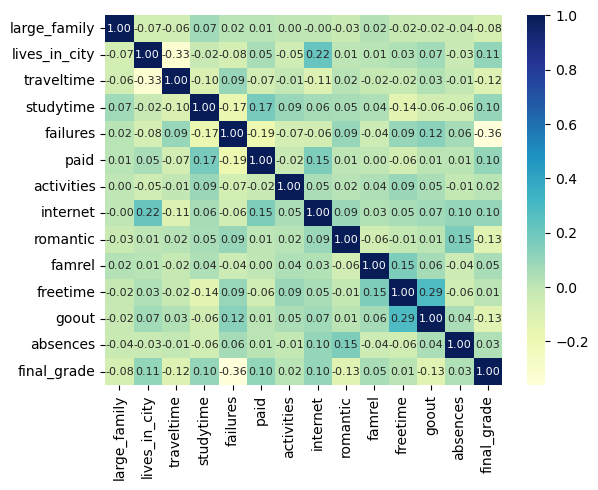

In [31]:
corr = full.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"fontsize":8})


Identifying the most correlated variables:

In [32]:
def highest_correlations(correlation_df):

    corr_df = round(correlation_df.abs(),2)

    # get the upper triangle of the correlation matrix (without the diagonal)
    upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))

    # find the indices of the four highest correlations
    max_correlations = upper_triangle.unstack().nlargest(4)

    # get the corresponding variable pairs and their correlations
    pairs_with_highest_corr = [(pair[0], pair[1], correlation) for (pair, correlation) in max_correlations.items()]

    return pairs_with_highest_corr

highest_correlations(corr)

[('final_grade', 'failures', 0.36),
 ('traveltime', 'lives_in_city', 0.33),
 ('goout', 'freetime', 0.29),
 ('internet', 'lives_in_city', 0.22)]

The variables with the highest correlation are:

- failures and final_grade (-0.36)

There appears to be a weak negative relationship between failures and final_grade. In theory, this probably makes sense, as one might assume that a student who has failed more classes might generally get lower grades. 

- traveltime and lives_in_city (-0.33)

There is also a weak negative relationship between a student's travel time, and whether or not they live in the city. Again, this is intuitive, as we would expect a lower travel time associated with students for which *lives_in_city* was true (equal to 1).

- goout and freetime (0.29)

There is a weak positive relationship between a student's *goout* rating, and *freetime* rating. This is probably due to the fact that students who have more free time go out with friends more often. 


- lives_in_city and internet (0.22)

There is also a weak positive correlation between living in the city and having internet. This could suggest that more rural students less often have access to the internet at home, or could mean that living in the city means you are more likely to have access to the internet.


### (c)
Creating scatterplots for the most correlated pairs in part (b). Note that the scatter plots were not hugely informative, given the majority of the data is numerical discrete, and as such, I included them for completeness but also used other plots which I felt illustrated the relationships between variables better.

First I will get the pairs and coefficients, stored as a list of tuples. The below correlations are **absolute** values, and the true correlations are visible in my interpretation above. 

In [33]:
pairs = highest_correlations(corr)
pairs

[('final_grade', 'failures', 0.36),
 ('traveltime', 'lives_in_city', 0.33),
 ('goout', 'freetime', 0.29),
 ('internet', 'lives_in_city', 0.22)]

**Relationship of Final Grades and Failures**

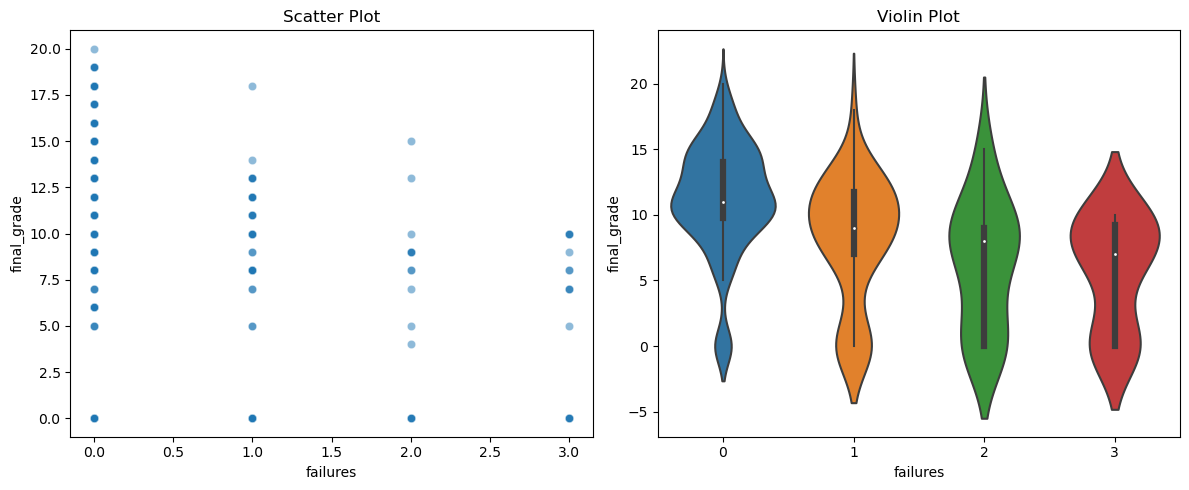

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=full, x='failures', y='final_grade', alpha=0.5, ax=axs[0])
axs[0].set_title('Scatter Plot')

# violin plot on the right subplot
sns.violinplot(data=full, x='failures', y='final_grade', kind='violin', ax=axs[1])
axs[1].set_title('Violin Plot')

plt.tight_layout()
plt.show()

We can see from the above plots, the violin plot especially, that generally, higher (lower) final grades for students are associated with a lower (higher) number of previous failures. This finding verifies the negative correlation of -0.36 I found above between final grades and failures when examining correlation. 

**Relationship of Travel Time and Lives in City**

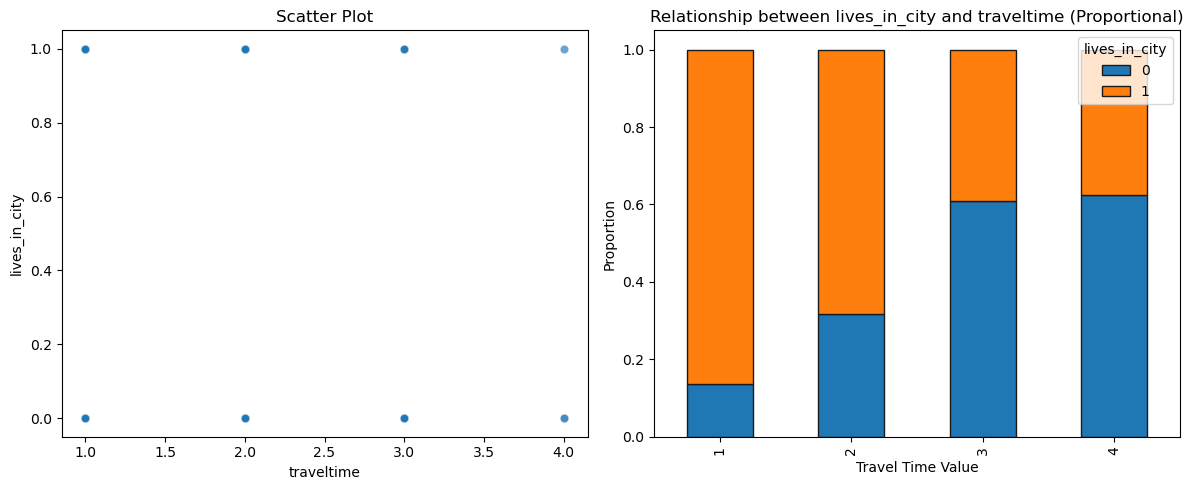

In [536]:
# create a cross-tabulation (contingency table) between the two variables
cross_tab = pd.crosstab(full['traveltime'], full['lives_in_city'])

# I found the plot hard to interpret initially as there are so few people with traveltime value 4
# let's normalise the cross-tabulation to get proportions 
cross_tab_normalised = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)


# create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=full, x='traveltime', y='lives_in_city', alpha=0.3, ax=axs[0])
axs[0].set_title('Scatter Plot')


# plot the proportional bar plot
cross_tab_normalised.plot(kind='bar', edgecolor='0.1',stacked=True, ax=axs[1])
axs[1].set_ylabel('Proportion')
axs[1].set_xlabel('Travel Time Value')
axs[1].set_title('Relationship between lives_in_city and traveltime (Proportional)')
plt.tight_layout()
plt.show()



The above plot shows that as living in the city is associated with lower travel times, while the opposite is true living rurally, those students generally experience longer travel times. This verifies the negative correlation of -0.33 that I found above between living in the city and travel times. 

**Relationship of Going Out and Free Time**

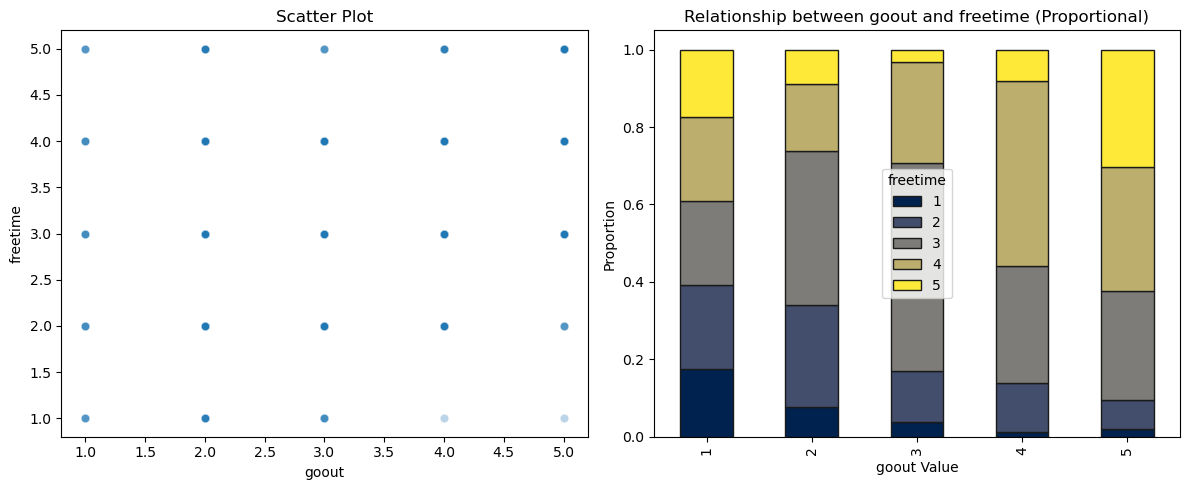

In [537]:
# create a cross-tabulation (contingency table) between the two variables
cross_tab = pd.crosstab(full['goout'], full['freetime'])

# again, I found the plot hard to interpret initially 
# let's normalise again the cross-tabulation to get proportions 
cross_tab_normalised = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)


# create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=full, x='goout', y='freetime', alpha=0.3, ax=axs[0])
axs[0].set_title('Scatter Plot')

# plot the proportional bar plot
cross_tab_normalised.plot(kind='bar', edgecolor='0.1',stacked=True, ax=axs[1], colormap='cividis')
axs[1].set_ylabel('Proportion')
axs[1].set_xlabel('goout Value')
axs[1].set_title('Relationship between goout and freetime (Proportional)')
plt.tight_layout()
plt.show()


Generally speaking, it looks like students with lower values of freetime go out with friends less often. This is clear to see for freetime values of 1 and 2, but less evident for higher freetime values. This would suggest a weak positive correlation between the two indicators, and indeed the correlation of 0.29 verifies this. This is somewhat an expected result, as having less free time would likely mean you have less time to go out with friends. 

**Relationship of Internet and Lives in City**

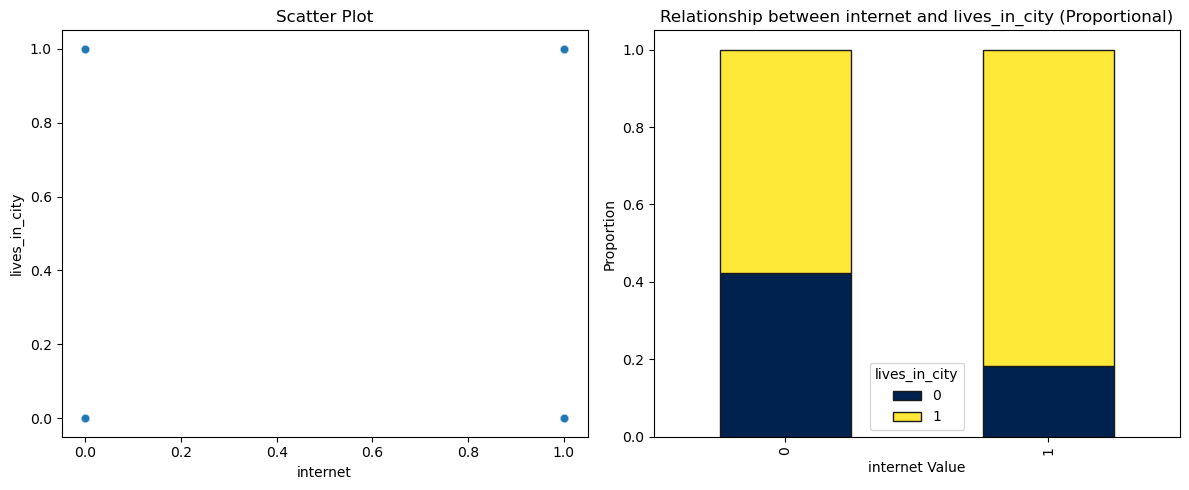

In [538]:
# create a cross-tabulation (contingency table) between the two variables
cross_tab = pd.crosstab(full['internet'], full['lives_in_city'])

# again let's normalise the cross-tabulation to get proportions 
cross_tab_normalized = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)


# create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=full, x='internet', y='lives_in_city', alpha=0.3, ax=axs[0])
axs[0].set_title('Scatter Plot')

# plot the proportional bar plot
cross_tab_normalized.plot(kind='bar', edgecolor='0.1',stacked=True, ax=axs[1], colormap='cividis')
axs[1].set_ylabel('Proportion')
axs[1].set_xlabel('internet Value')
axs[1].set_title('Relationship between internet and lives_in_city (Proportional)')
plt.tight_layout()
plt.show()


Generally, if a student has internet access at home, they are also more likely to be living in an urban area, rather than a rural area. But if a student does not have internet access at home, the relationship is not so clear cut, they are still more likely to live in the city but less so than when they have internet access. From this, I would think the variables likely have weak positive correlation, and this is verified by the correlation found above of 0.22.

# Question 4
Logistic Regression to predict student pass/fail.

### (a)
Adding a column to indicate student pass/fail:
I use the numpy *.where()* method to search the *final_grade* series for where the grade being greater or equal to 10 holds true, and assign 1 (pass) to that case or 0 otherwise (fail). 

In [307]:
full_copy = full.copy()
# full_copy['pass'] = [1 if grade>=10 else 0 for grade in q4_data['final_grade']]
full_copy['pass'] = np.where(full_copy['final_grade']>=10, 1, 0)

In [308]:
full_copy

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,pass
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15,1
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11,1
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19,1
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15,1
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10,1
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6,0
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8,0


### (b)
Separating into response **y** and predictor variables **X**, and standardising the continuous predictor *absences*:

In [311]:
y = full_copy['pass']
X = full_copy.drop(columns=['pass', 'final_grade']).copy()
X['absences'] = (X['absences'] - X['absences'].mean())/(X['absences'].std())



In [312]:
X

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,0,1,1,2,0,1,1,1,0,5,4,2,0.536185
1,0,1,1,2,0,0,0,1,0,4,4,4,-0.713332
2,0,1,1,2,0,1,0,1,0,4,2,2,-0.713332
3,1,1,1,2,0,1,1,1,0,5,5,1,-0.713332
4,0,1,1,1,0,1,1,1,0,4,3,3,-0.463428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,2,3,0,1,0,0,0,5,3,3,-0.463428
391,1,0,3,1,0,1,1,1,1,4,4,3,0.161330
392,1,0,1,3,1,0,1,1,0,5,4,2,-0.713332
393,0,1,1,2,0,1,0,1,0,4,3,4,-0.713332


### (c)
Fitting a logistic regression model, and then interpreting it:

Firstly, I added an intercept column to the DataFrame. This is required for statsmodels. 

In [313]:
X_w_constant = sm.add_constant(X)
X_w_constant.head()

,const,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,1.0,0,1,1,2,0,1,1,1,0,5,4,2,0.536185
1,1.0,0,1,1,2,0,0,0,1,0,4,4,4,-0.713332
2,1.0,0,1,1,2,0,1,0,1,0,4,2,2,-0.713332
3,1.0,1,1,1,2,0,1,1,1,0,5,5,1,-0.713332
4,1.0,0,1,1,1,0,1,1,1,0,4,3,3,-0.463428


Model fit and summary:

In [314]:
model = sm.Logit(y, X_w_constant)
fit = model.fit(disp=False)

print(fit.summary())
print('AIC:', round(fit.aic, 2))

                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                  395
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1221
Time:                        18:02:30   Log-Likelihood:                -219.70
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.330e-08
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2967      0.874      1.483      0.138      -0.417       3.010
large_family     -0.2654      0.266     -0.998      0.318      -0.786       0.256
lives_in_city     0.1218      0.301     

Getting predicted labels: 1 (pass) if predicted probability greater than threshold of 0.5, otherwise 0 (fail):

In [315]:
predicted_probabilities = fit.predict(X_w_constant)
threshold = 0.5

# convert probabilities to binary predictions
predicted_labels = (predicted_probabilities > threshold).astype(int)

accuracy = accuracy_score(y, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 72.15%


**Model Interpretation**

**`Intercept` (1.297):**
This is the log-odds of the response variable being 1 when all predictor variables are zero. (Not Significant)

**Feature Coefficients:**

- **`large_family` (-0.265):**
  When the binary "large_family" variable is true (family size greater than 3), the log-odds of the response being 1 decrease by approximately 0.265. (Not Significant)

- **`lives_in_city` (0.122):**
  When the binary "lives_in_city" variable is true (residence type is urban), the log-odds of the response being 1 increase by approximately 0.122. (Not Significant)

- **`traveltime` (0.009):**
  For a one-unit increase in "traveltime," the log-odds of the response being 1 increase by approximately 0.009. (Not Significant)

- **`studytime` (0.048):**
  For a one-unit increase in "studytime," the log-odds of the response being 1 increase by approximately 0.048. (Not Significant)

- **`failures` (-0.900):**
  For a one-unit increase in the "failures" variable, the log-odds of the response being 1 decrease by approximately 0.900. (Significant)

- **`paid` (0.154):**
  When the binary "paid" variable is true (extra paid classes taken in the subject), the log-odds of the response being 1 increase by approximately 0.154. (Not Significant)

- **`activities` (-0.054):**
  When the binary "activities" variable is true (student does extracurricular activities), the log-odds of the response being 1 decrease by approximately 0.054. (Not Significant)

- **`internet` (0.364):**
  When the binary "internet" variable is true (Internet access at home) the log-odds of the response being 1 increase by approximately 0.364. (Not Significant)

- **`romantic` (-0.344):**
  When the binary "romantic" variable is true (in a romantic relationship) the log-odds of the response being 1 decrease by approximately 0.344. (Not Significant)

- **`famrel` (0.072):**
  For a one-unit increase in "famrel," the log-odds of the response being 1 increase by approximately 0.072. (Not Significant)

- **`freetime` (0.136):**
  For a one-unit increase in "freetime," the log-odds of the response being 1 increase by approximately 0.136. (Not Significant)

- **`goout` (-0.382):**
  For a one-unit increase in "goout," the log-odds of the response being 1 decrease by approximately 0.382. (Significant)

- **`absences` (-0.128):**
  For a one-unit increase in "absences," the log-odds of the response being 1 decrease by approximately 0.128. (Not Significant)

As we can see above, the model has an accuracy of 72.15%. However, only the predictors *failures* and *goout* have coefficients which are significant. They are both significant at the 1% level of significance. Both *failures* and *goout* have a negative impact on the likelihood of passing.

### (d)
Forward selection for the logistic regression model using Akaike Information Criterion:

Process:

1. Start with an Empty Model, i.e. begin with no predictors.

2. Add Predictors:

- Add predictors one at a time, choosing the one that minimizes AIC at each step.

- Continue adding predictors until AIC no longer decreases.

4. Final Model:

- The model with the lowest AIC is the final model.


The process aims to find a simple but effective logistic regression model by iteratively adding predictors based on their impact on AIC. This results in a model which balances fit and complexity.

Below is a function to execute the forward selection, with comments throughout explaining the process. It takes in the predictors, **X**, and the response, **y**:

In [316]:
def forward_selection_aic(X, y):
    
    # Create an empty list to store selected features
    selected_features = []

    # Get the list of predictor variables
    predictors = X.columns.tolist()

    # Initialize AIC with a large value
    best_aic = float("inf")

    # iterates through predictors while list of remaining predictors is not empty
    while predictors:
        # make an empty list to store AIC values
        aic_values = []

        # loop through the remaining predictors
        for predictor in predictors:
            # add the predictor to the selected features
            current_features = selected_features + [predictor]

            # fit a logistic regression model
            X_current = sm.add_constant(X[current_features])
            model = sm.Logit(y, X_current)
            result = model.fit(disp=False) # mute output

            # get the AIC value
            aic = result.aic
            aic_values.append((predictor, aic))

        # find the predictor which minimises the AIC (i.e. best predictor)
        best_predictor, best_aic_candidate = min(aic_values, key=lambda x: x[1])

        # check if this new best model has a lower AIC than the previous best model
        if best_aic_candidate < best_aic:
            # add the best predictor to the list of selected features
            selected_features.append(best_predictor)

            # update the new best AIC value
            best_aic = best_aic_candidate

            # remove the selected predictor from the list of potential remaining ones
            predictors.remove(best_predictor)
        else:
            # AIC does not improve, then stop the selection process
            break

    # fit the final model again with the selected features
    X_final = sm.add_constant(X[selected_features])
    final_model = sm.Logit(y, X_final).fit(disp=False)

    return X_final, selected_features, final_model

X_final, selected_features, final_model = forward_selection_aic(X, y)
print("Selected Features:", selected_features)
print(final_model.summary())
print('AIC:', round(final_model.aic,2))

Selected Features: ['failures', 'goout']
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                  395
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1053
Time:                        18:12:36   Log-Likelihood:                -223.90
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.606e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0666      0.364      5.674      0.000       1.353       2.781
failures      -0.9665      0.173     -5.587      0.000      -1.306      -0.627
goout      

Using forward selection on the Logistic Regression model with the AIC, we identified *failures* and *goout* as the two best predictors for minimising AIC. Now I will do the same as before to get the predicted labels, and then check the model accuracy:

In [185]:
predicted_probabilities = final_model.predict(X_final)
threshold = 0.5

# convert probabilities to binary predictions
predicted_labels = (predicted_probabilities > threshold).astype(int)

accuracy = accuracy_score(y, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 73.16%


**Model Interpretation**

**`Intercept` (2.067):**
This is the log-odds of the response variable being 1 when all predictor variables are zero.

**Feature Coefficients:**

- **`failures` (-0.967):**
  For a one-unit increase in the "failures" variable, the log-odds of the response being 1 decrease by approximately 0.967. (Significant)

- **`goout` (-0.319):**
  For a one-unit increase in "goout," the log-odds of the response being 1 decrease by approximately 0.319. (Significant)





In this new model, found using forward selection with AIC, we can see that only the predictors *failures* and *goout* were selected. Recall that these were the only two significant predictors in the previous model using all predictors. It is not a surprising result that the model which minimises AIC contains only the most significant predictors, as adding more less significant predictors would reduce parsimoniousness in exchange for only a small possible increase in accuracy, if any. The new model has slightly higher accuracy (73.16%) than the previous model. Overall it is a better model, as it is more parsimonious (less predictors) while still achieving a higher accuracy. To further explore this, one could use cross validation, and test both models out of sample on data they are not previously trained on. 

# Question 5

Random forest regression for final grade prediction.

### (a)
Splitting the data into train and test sets:

Reset **X** and **y**:

In [318]:
y = full['final_grade'].copy()
X = full.drop(columns='final_grade').copy()

**Note:** As Random Forests are based on tree partitioning algorithms, we are not required to standardise X in this case.

Let's use 295 for the train size, as it is roughly 75% of the dataset. This leaves 100 points for testing (roughly 25% of the dataset)

In [319]:
train_size = 295
np.random.seed(1234)
select = np.random.permutation(range(len(y)))
X_train = X.iloc[select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[select[train_size:],:].reset_index(drop=True)
y_train = y[select[:train_size]].reset_index(drop=True)
y_test = y[select[train_size:]].reset_index(drop=True)

### (b)
Fitting a random forest with 10 trees. Determining the most important variables and comparing to Q4.

In [320]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 101)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

In [321]:
feature_importances = rf.feature_importances_.tolist()

display(pd.DataFrame(zip(X.columns, feature_importances),
                     columns=['features', 'importance']).sort_values(by='importance', ascending=False))

,features,importance
12,absences,0.242718
4,failures,0.177126
10,freetime,0.124583
2,traveltime,0.084764
9,famrel,0.075051
11,goout,0.070691
3,studytime,0.057068
8,romantic,0.042203
6,activities,0.031054
7,internet,0.025160


**Discussion and Comparison to Q4**

Interestingly, in the logistic regression I found that *failures* and *goout* were the only predictors with statistically significant coefficients. 

In this case, we again see that *failures* is a very important variable, which suggests that the number of past failures is a consistent predictor of academic performance. Surprisingly, *absences* now has the highest feature importance, suggesting that, in the context of predicting continuous final grades, the frequency of absences has a substantial impact. 

Notably, *goout* has dropped in importance in the random forest model, ranking as the 6th most important variable. This change in importance could be due to the different nature of the outcome variable (continuous final grade vs binary pass/fail) and the modeling approach of a random forest. Random Forest models can capture non-linear relationships in the data, as well as interactions between variables, which would not be captured by the logistic regression. I would further suggest that this difference in feature importance could be due to the fact that we are now predicting something else, the final grade of the student, rather than whether they pass or fail. Perhaps the other predictors, like *absences*,  are more useful in predicting the exact grade of the student. 

The fact that *failures* remains important in both models suggests its robust influence on academic outcomes, whether predicting pass/fail or final grades.
The shift in importance of *goout* could be attributed to the different nature of the outcome variable. While it was a significant predictor for binary pass/fail outcomes, its importance diminishes when predicting continuous grades, indicating that other factors become more relevant in this context, such as *freetime*, *traveltime* and *famrel*.

The prominence of *absences* in the random forest model for continuous grades suggests that attendance might play a more critical role in determining the overall performance of students across a range of grades.

### (c)
Using the random forest model to predict the final grade of a student in the test set. 

In [322]:
rf_pred = rf.predict(X_test)

In [323]:
mean_squared_error(rf_pred, y_test)

16.234825

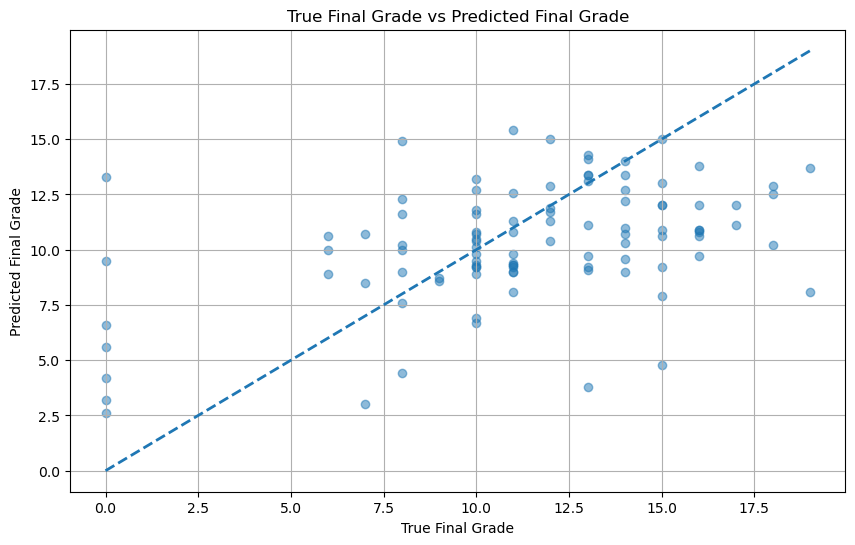

In [324]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('True Final Grade vs Predicted Final Grade')
plt.xlabel('True Final Grade')
plt.ylabel('Predicted Final Grade')

# now add 45 degree line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', linewidth=2, label='y=x line')
plt.grid(True)
plt.show()


Ideally, all points would align perfectly along the 45-degree line, indicating that the predicted values exactly match the true values. Upon inspection, there does not appear to be a noticeable trend where the points cluster either above or below the line, which implies that there is no systematic tendency to overestimate. However, there does appear to be some interesting behaviour in the model when it comes to final grades with a value of 0. There are several observations in the dataset where the true final grade is zero, but the model I fitted does not predict any observations to have a final grade of zero. It appears that for these extreme low values, the model consistently overestimates the final grade. Interestingly, it appears that for some of the extreme high values, the model then seems to underestimate the final grade. 

While the model demonstrates some degree of accuracy, further investigation into the reasons behind the consistent overestimation and underestimation at the extremes, as well as further analysis of influential features, could enhance its predictive capabilities. 

### (d)
Assessing the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000,
and 5000 trees in predicting the final grade of a student. 

The model fit and prediction is repeated 20 times for each number of trees, using a different random state for each repeat.


In [125]:
n_trees = [5, 10, 50, 100, 500, 1000, 5000]
n = 20

In [131]:
# make lists to store mean and standard error for each number of trees
mean_mse_list = []
std_mse_list = []

for trees in tqdm(n_trees):
    mse_values = []
    for rs in range(n):
        # split the data into training and testing sets with a different random state each time
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
        
        # initialise the Random Forest regression model
        rf_model = RandomForestRegressor(n_estimators=trees, random_state=rs)
        
        # fit the model to the training data
        rf_model.fit(X_train, y_train)
        
        # use the model to predict on the test set
        y_pred = rf_model.predict(X_test)
        
        # calculate mean squared error
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    
    # calculate mean and standard error of MSE for the current number of trees
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values) / np.sqrt(len(mse_values))
    
    mean_mse_list.append(mean_mse)
    std_mse_list.append(std_mse)

100%|█████████████████████████████████████████████| 7/7 [03:22<00:00, 28.93s/it]


Plot of the model performance (mean squared error metric) as a function of the number of trees (using a log axis for
the number of trees). The plot shows the mean and standard error of the mean squared error.

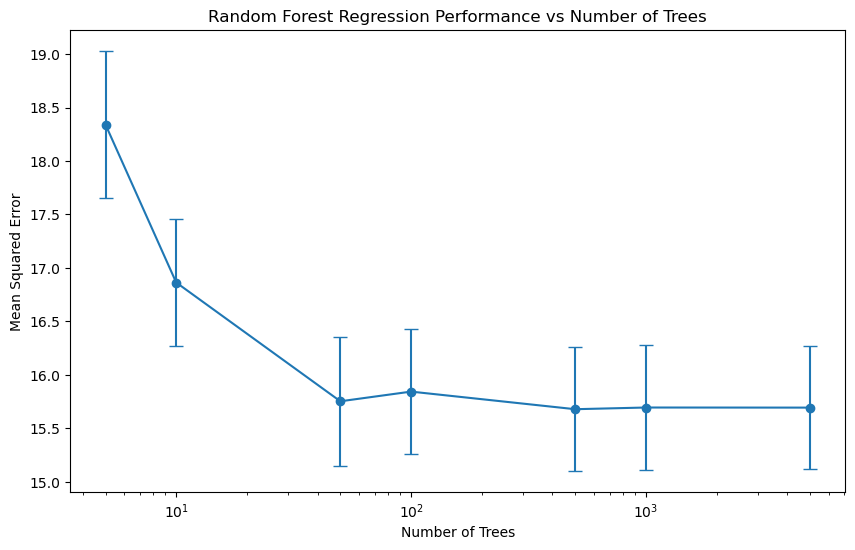

In [133]:
plt.figure(figsize=(10, 6))
plt.errorbar(n_trees, mean_mse_list, yerr=std_mse_list, fmt='o-', capsize=5)
plt.xscale('log')  # use a log scale for the number of trees
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Regression Performance vs Number of Trees')
plt.show()

**Interpretation**

The purpose of this analysis is to understand how the number of trees in a random forest model affects its performance in predicting the final grade of a student. 

The plot displays both the mean and standard error of the Mean Squared Error for each number of trees, and uses a log axis for the number of trees (allows for better scale on x axis). 

It is apparent that more trees decreases the mean squared error, up to a certain point (in this case around 50 trees), after which the mean squared error becomes quite stable, and stays around 15.75 for increased trees sizes beyond 50. In fact, it increases slightly for the case where 100 trees are used. This indicates that there is diminishing returns when it comes to how many trees are used. 

In terms of the standard error, we can see the error bars are a bit longer when just 5 trees are used. They get slightly smaller for 10 trees used, but then remain quite consistent and do not decrease further when more trees are used. 

Overall, it does not appear that using many more trees causes overfitting (Mean Squared Error does not increase). Rather, it is a case that more trees just does not improve performance beyond a certain number of trees (50). Considering the computational cost of running a random forest with 5000 trees, we should opt to use 50 trees as it has effectively the same accuracy but will run in a fraction of the time. 

### (e)
Explaining the rationale for fitting the model multiple times with different random states:

Fitting the model multiple times with different random states serves the purpose of cross-validation. Cross validation is a fundamental technique in machine learning evaluation, and the rationale behind this approach is to mitigate the influence of a particular data split on the model's performance assessment. By introducing variability in the training and testing datasets through different random states, we gain information about the model's robustness and its ability to generalise (or not) across different subsets of the data. This helps address the potential impact of an unusually favorable or unfavorable data split, ensuring that the model's performance is not overly dependent on a single configuration. 

The resulting evaluation, here presented as mean and standard error across 20 runs, provides a more comprehensive and reliable understanding of the model's generalisation capabilities, offering statistical confidence in the reported performance metrics. Additionally, this strategy helps to assess the stability of chosen hyperparameters (here the number of trees), and offers insights into whether the model's performance consistently holds or exhibits significant variations across different data partitions. To summarise, fitting the model with various random states contributes to a more robust and representative evaluation, aligning with the goal of understanding the model's true generalisation potential.

# Question 6
Clustering algorithms to identify different groups

### (a)
Performing a K-Means cluster analysis, using the indicators as the features:

The K-Means clustering algorithm is run below for different numbers of clusters (integers from 1 to 10). The model performance is then plotted as a function of the number of clusters.

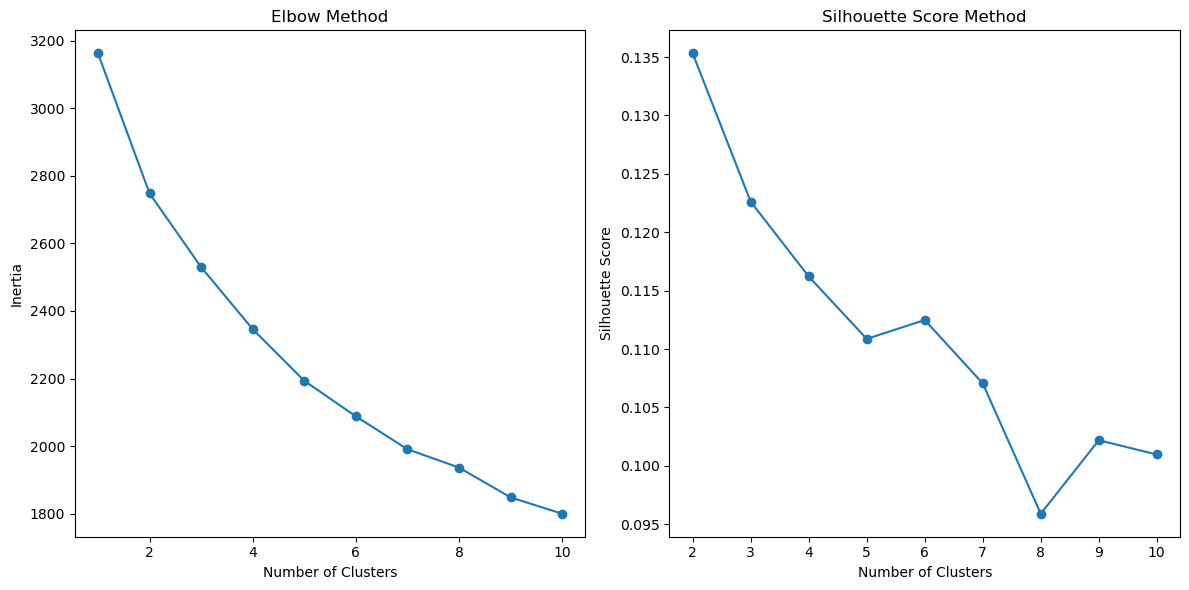

In [474]:
# clustering is distance based - need to standardise numerical indicators

X = full.copy()
X['absences'] = (X['absences'] - X['absences'].mean())/(X['absences'].std())
X['final_grade'] = (X['final_grade'] - X['final_grade'].mean())/(X['final_grade'].std())


num_clusters = range(1, 11)

# lists to store performance metrics
inertia_values = []
silhouette_scores = []

# loop through different values for k
for k in num_clusters:
    # fit model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # append the inertia or WCSS to the list
    inertia_values.append(kmeans.inertia_)

    # append silhouette score to the list
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# plot inertia (elbow method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(num_clusters[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


**Identifying the optimal number of clusters for this data**:

**Elbow Method**

The elbow method helps to identify the optimal number of clusters by observing the rate of decrease in the sum of squared distances between data points and their assigned clusters (inertia) as the number of clusters increases.

**Silhouette Score Plot**

The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

**Optimal Number**

Looking for the "elbow" point on the elbow method plot, where the inertia starts to decrease at a slower rate, we see that there is no extremely obvious elbow point.
Looking next to the silhouette score plot, k=2 is clearly the highest, and since a higher silhouette score is better, we will opt to choose 2.  

### (b)
Performing a K-Means cluster analysis, using the optimal number of clusters of 4 identified above. I then use KDE plots, separated by clusters, to identify the most discriminatory variables.

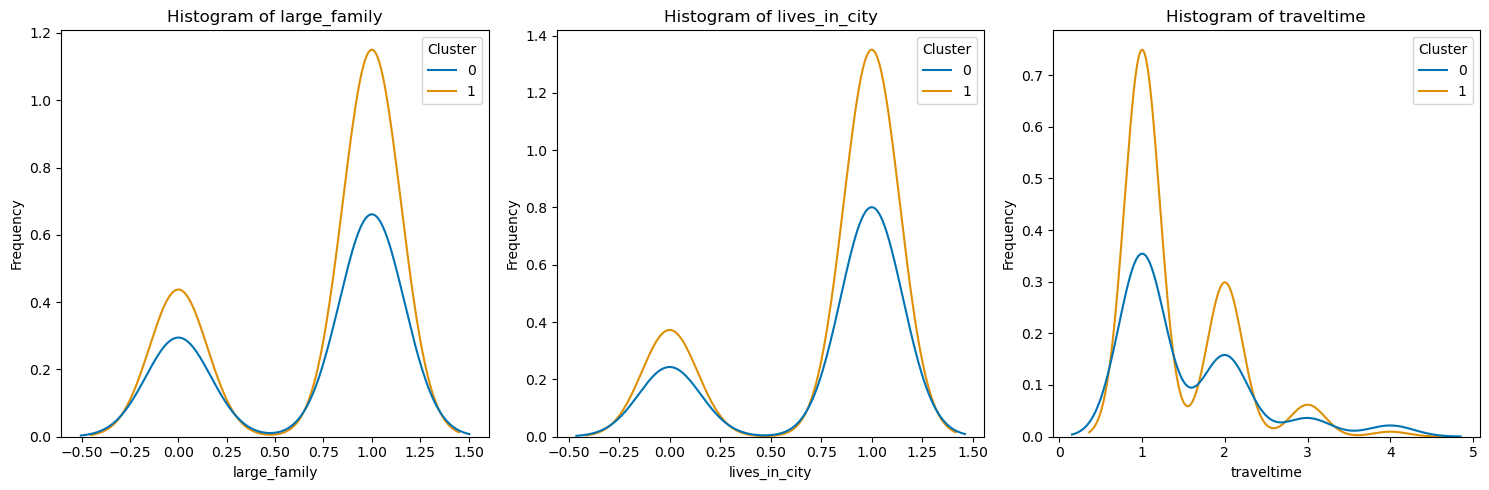

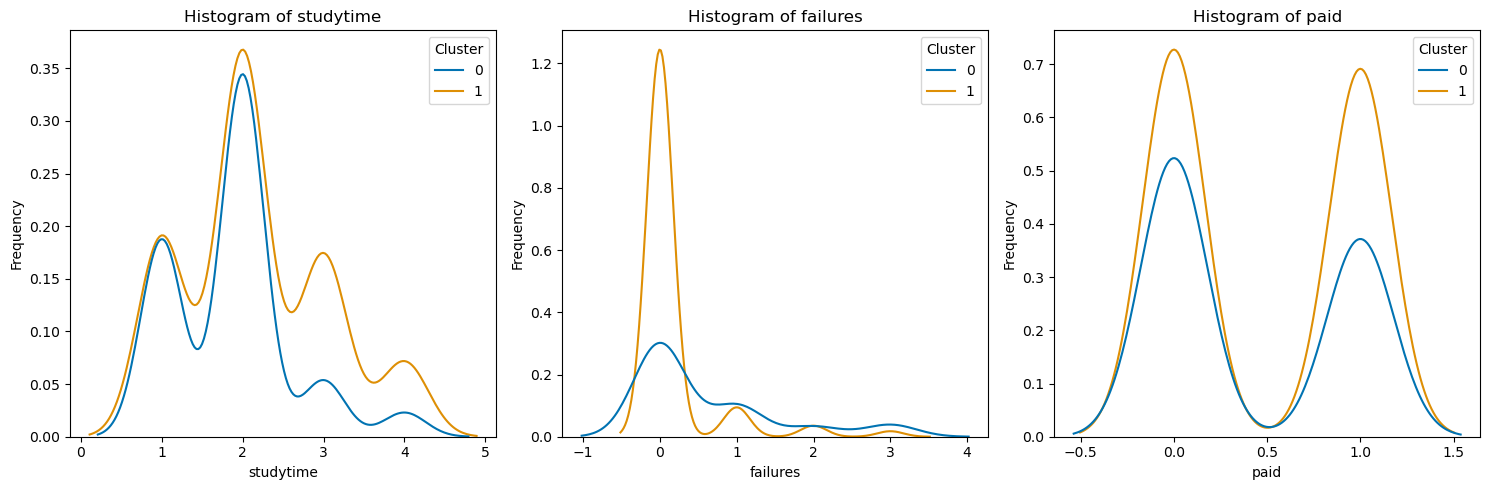

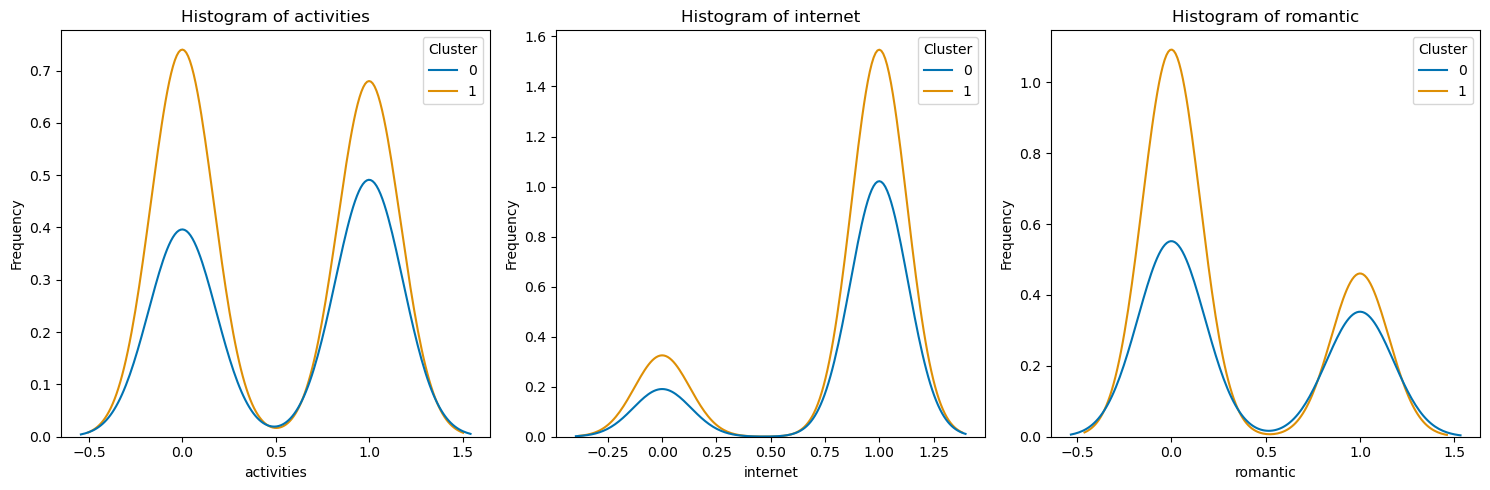

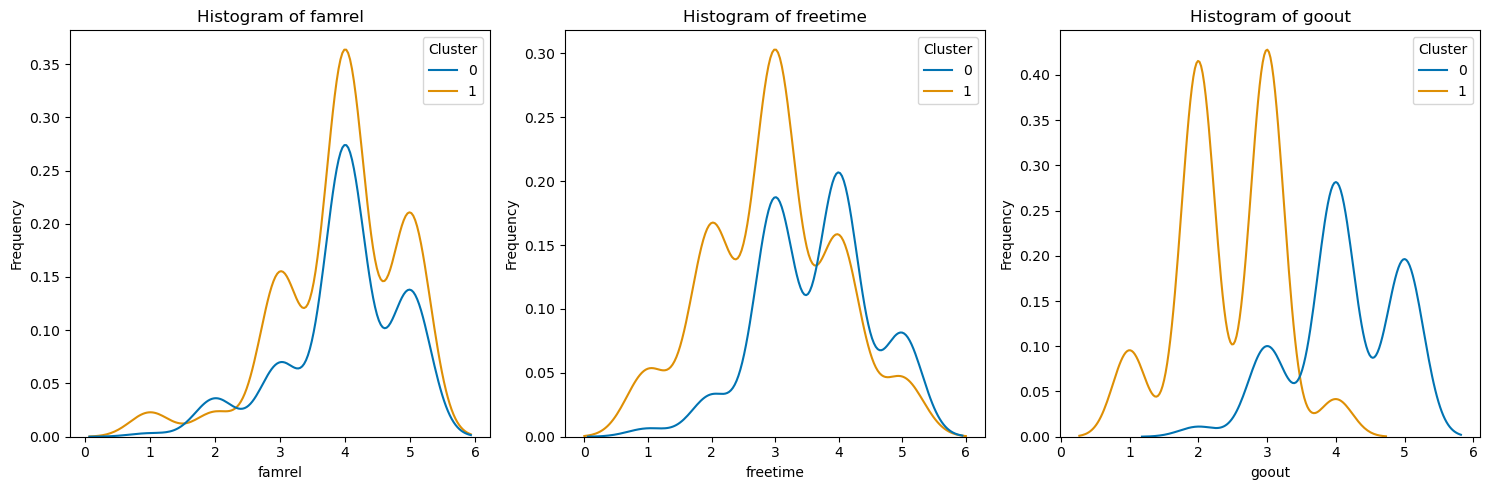

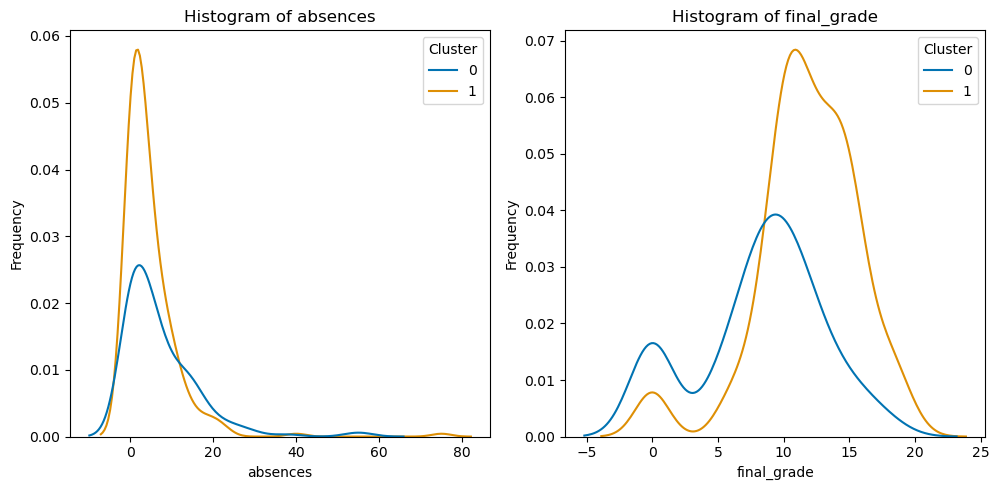

In [502]:
optimal_num_clusters = 2
X = full.copy()
X['absences'] = (X['absences'] - X['absences'].mean())/(X['absences'].std())
X['final_grade'] = (X['final_grade'] - X['final_grade'].mean())/(X['final_grade'].std())
# fit k-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# create a DataFrame with data and cluster labels, and non-standardised numerical variables
data_with_clusters = full.copy()
data_with_clusters['Cluster'] = cluster_labels

histograms_per_row = 3

# matrix of histograms using seaborn
features = data_with_clusters.columns[:-1]  # do not plot the 'Cluster' column

for i in range(0, len(features), histograms_per_row):
    plt.figure(figsize=(15, 5))
    for j, feature in enumerate(features[i:i + histograms_per_row]):
        plt.subplot(1, histograms_per_row, j + 1)
#         sns.histplot(data=data_with_clusters, x=feature, hue='Cluster', kde=False, multiple="dodge", alpha=0.7, palette='pastel')
        sns.kdeplot(data=data_with_clusters, x=feature, hue='Cluster', palette='colorblind', warn_singular=False)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

From the above plots, I have identified the most discriminatory variables to be:

- goout

- absences

- final_grade


### (c)
Creating a series of scatter plots for the most discriminatory variables, colouring the points
by cluster number. 

Cluster sizes:

In [506]:
data_with_clusters['Cluster'].value_counts()

1    236
0    159
Name: Cluster, dtype: int64

Cluster 0 is clearly largest, and it contains the majority of the dataset.

**goout**

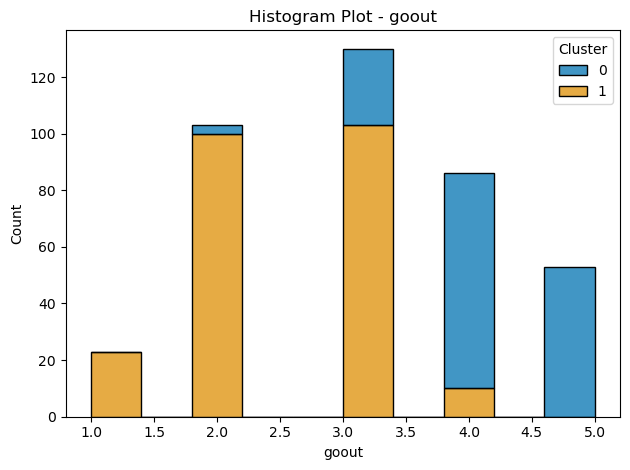

In [511]:
sns.histplot(data=data_with_clusters, x='goout', multiple='stack', hue = 'Cluster', palette='colorblind')
plt.title('Histogram Plot - goout')
plt.tight_layout()
plt.show()

There is separation in the two clusters for the indicator *goout*. Students in Cluster 0 tend to go out with friends more, while students in Cluster 1 tend to go out with friends less often.

**absences** and **final_grade**

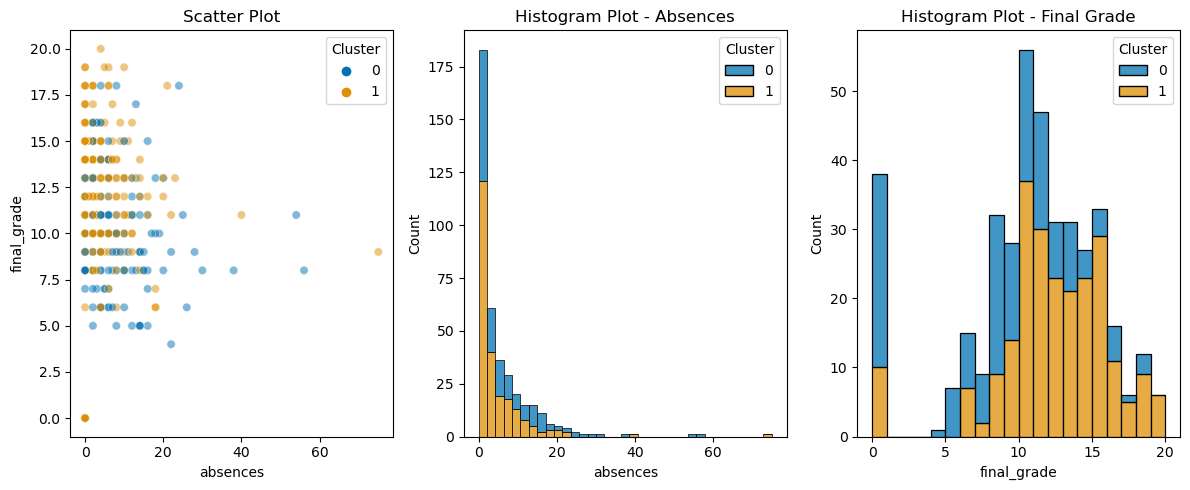

In [512]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=data_with_clusters, x='absences', y='final_grade', hue='Cluster', alpha= 0.5, palette='colorblind',ax=axs[0])
axs[0].set_title('Scatter Plot')

# kde plot on middle subplot
# sns.kdeplot(data=data_with_clusters, x='absences', hue = 'Cluster', palette='colorblind', ax=axs[1])
sns.histplot(data=data_with_clusters, x='absences', multiple='stack', hue = 'Cluster', palette='colorblind', ax=axs[1])

axs[1].set_title('Histogram Plot - Absences')

# kde plot on the right subplot
# sns.kdeplot(data=data_with_clusters, x='final_grade', hue = 'Cluster',palette='colorblind',  ax=axs[2])
sns.histplot(data=data_with_clusters, x='final_grade', multiple='stack', bins=20,hue = 'Cluster',palette='colorblind',  ax=axs[2])

axs[2].set_title('Histogram Plot - Final Grade')

plt.tight_layout()
plt.show()


The above plots analyse the two clusters for the indicators *absences* and *final_grade*. For absences, the separation is less clear, with perhaps Cluster 1 students generally having less absences than Cluster 0 students.  

For final grades, Cluster 0 students were generally more likely to have lower grades, with many receiving a final grade of 0. While some students in Cluster 1 also received a final grade of zero, they were usually more likely to have higher grades. The students who got the top grades, 19 or 20, were all in Cluster 1. As we can see below, the top 6 students were all in Cluster 1.

In [534]:
data_with_clusters.sort_values(ascending=False, by='final_grade').head(8)

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,Cluster
27,1,1,1,4,0,0,1,1,0,4,2,2,4,20,1
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19,1
53,0,1,1,1,0,0,0,1,0,3,5,2,10,19,1
384,0,0,2,3,0,0,0,1,0,5,4,4,0,19,1
52,0,1,1,1,0,0,1,1,0,5,5,3,6,19,1
327,1,1,1,3,0,1,0,1,0,4,3,3,5,19,1
25,1,1,1,2,0,0,1,1,0,4,3,3,2,18,1
234,1,1,1,1,0,1,1,1,0,4,5,5,4,18,0


**Does this verify the existence of different clusters in the data?**

There does appear to be some meaningful differences in the clusters of students in the different groups. The main differences in the clusters appears to be that Cluster 1 students go out less, have less absences and higher grade distributions, while Cluster 0 students go out more, have more absences and a lower grade distribution, with more 0 grades. However, the differences are not extremely obvious or clear cut for the numerical discrete indicators. Beyond these points, it is difficult to fully ascertain precisely what groups of students exist in the dataset. 

A particular challenge here is using k-means on a dataset which has many binary values and discrete values. My understanding is that k-means should generally be avoided. K-means needs to compute means, and the mean value is not meaningful on this kind of data.

### (d)
Using another suitable clustering algorithm:

In this section, I've chosen the K-Prototypes clustering algorithm due to the dataset's mix of binary, discrete numerical, and continuous numerical features. K-Prototypes excels in handling this combination, combining the strengths of K-means and K-modes clustering. Note that I interpret binary and numerical discrete features as categorical data to use the algorithm. Although this leads to some loss of information, specifically that categorical data is unordered, and we now lose information on, for example, whether a student has more or less studytime than another, I was interested to see how clustering these features by modes rather than means would work (the mean of these features is not particularly meaningful anyway, as I stated above). Effectively, I am suggesting that the mode of these binary and discrete numerical indicators is a better representative for clustering than the mean. I think this is a reasonable suggestion as some of the discrete numerical features are, by construction, created by grouping data into bins.

The K-Prototypes ensemble, combining K-means and K-modes, appears well-suited for datasets like this one, which involve both numerical and categorical data (as I assumed).

To learn more about K-Prototypes and K-Modes clustering, I referred to Zhexue Huang's 1997 paper, "Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values." KModes, designed for categorical data, emphasises dissimilarity based on the mode, the most frequent value.

I applied the K-Prototypes algorithm using a PyPi package (https://pypi.org/project/kmodes/). K-Prototypes addresses K-Modes' limitations with continuous numerical features, ensuring a robust clustering solution for this mixed data scenario. 

Below, **init="Huang"** determines how the quantitative variables' centroids are initialised, and **n_init** controls how many times the algorithm is run with different initialisations to find the best clustering solution. The combination of these parameters helps improve the robustness of the k-prototype clustering algorithm. The *categorical* argument passed to the function is a list of positions of all the categorical arguments. Here it is every column except the two continuous numerical features (*absences* and *final_grade*):

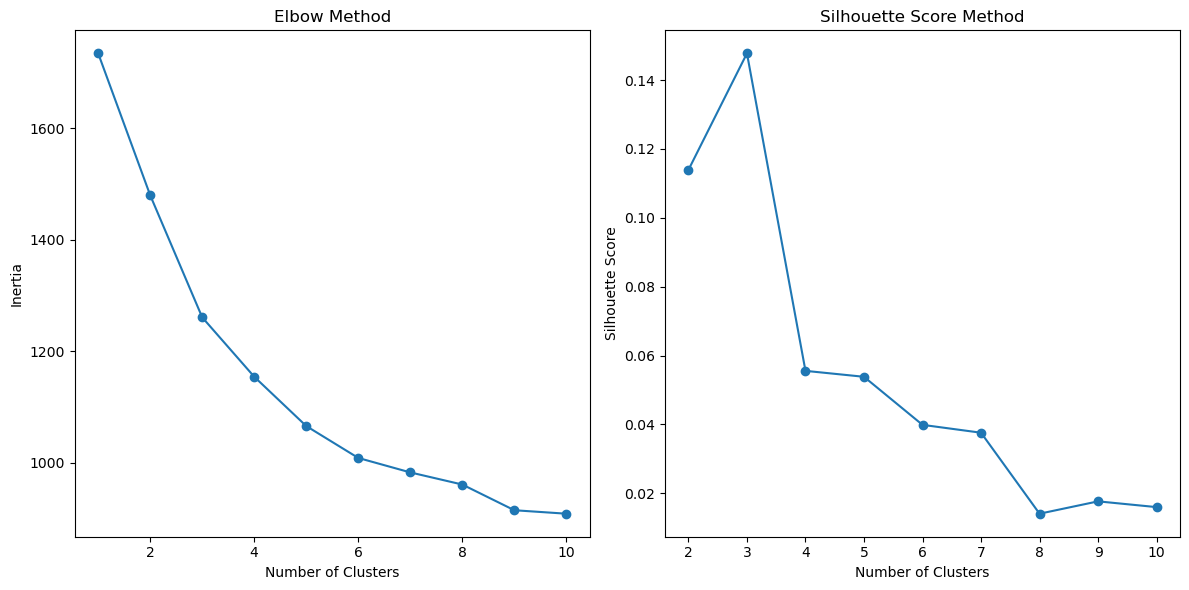

In [478]:
data = full.copy()

num_clusters = range(1, 11)
data['absences'] = (data['absences'] - data['absences'].mean())/(data['absences'].std())
data['final_grade'] = (data['final_grade'] - data['final_grade'].mean())/(data['final_grade'].std())

# lists to store performance metrics
silhouette_scores = []
costs = []

for k in num_clusters:
    # fit model
    X = data.copy()
    kproto = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kproto.fit(X, categorical=list(range(0,12)))
    
    # append the cost or WCSS to the list
    costs.append(kproto.cost_)

    # append silhouette score to the list
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kproto.labels_))

# plot cost (elbow method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters, costs, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(num_clusters[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Again there is no clear "elbow point" in the Elbow Method plot, but with the clear peak in silhouette score at 3, hence I will choose an optimal k of 3:

In [513]:
data = full.copy()

data['absences'] = (data['absences'] - data['absences'].mean())/(data['absences'].std())
data['final_grade'] = (data['final_grade'] - data['final_grade'].mean())/(data['final_grade'].std())

kp = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=0)

clusters = kp.fit_predict(data, categorical=list(range(1,13)))

labels = pd.DataFrame(kp.labels_, columns=['Cluster'])
data_kproto = pd.concat([full.copy(), labels], axis='columns') # add back non standardised for plots


Cluster sizes:

In [514]:
data_kproto['Cluster'].value_counts()

2    202
1    144
0     49
Name: Cluster, dtype: int64

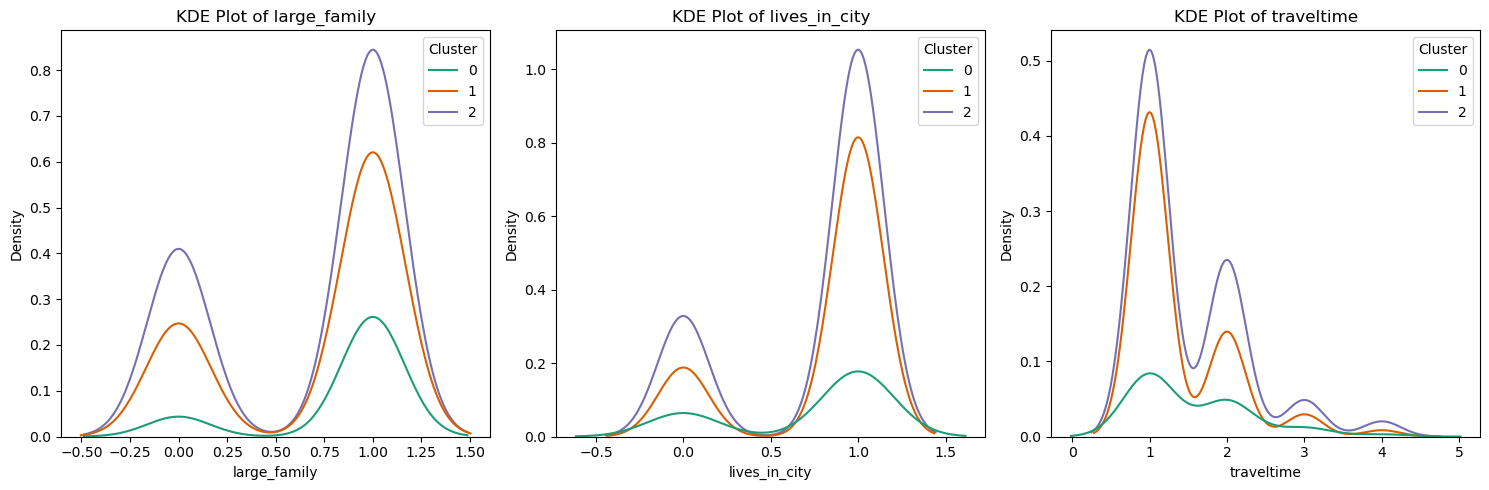

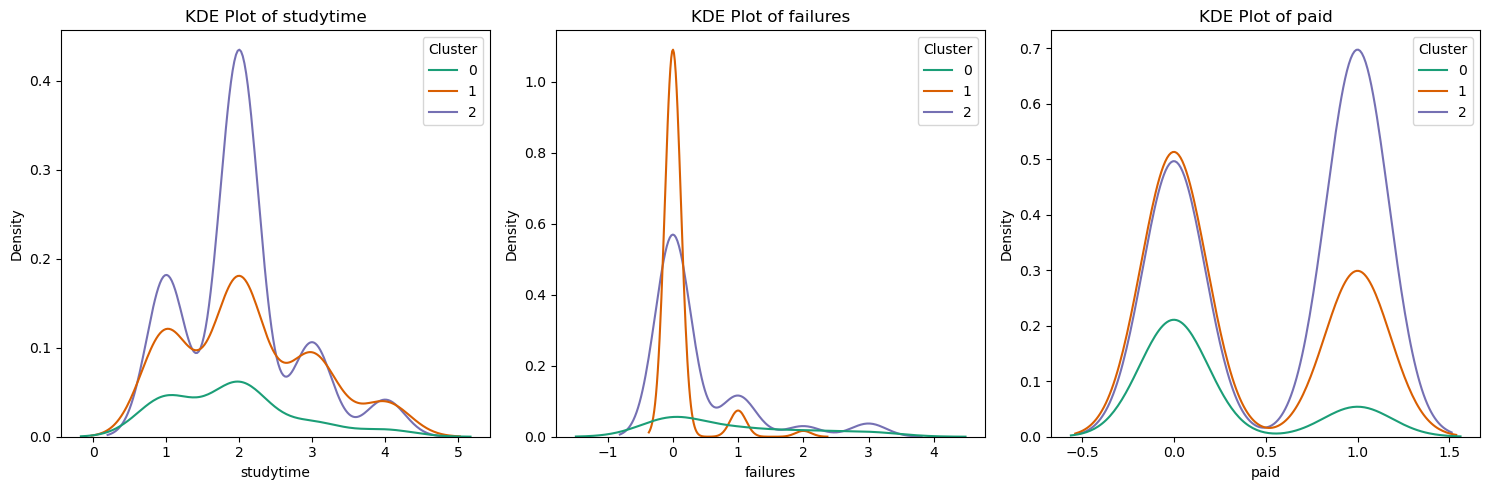

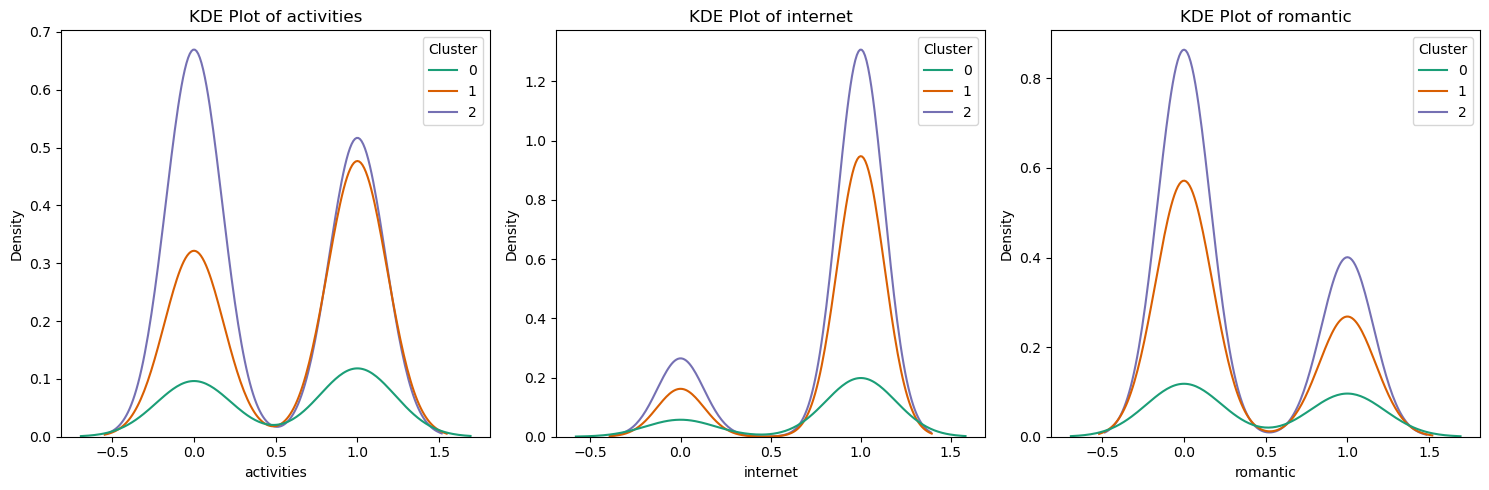

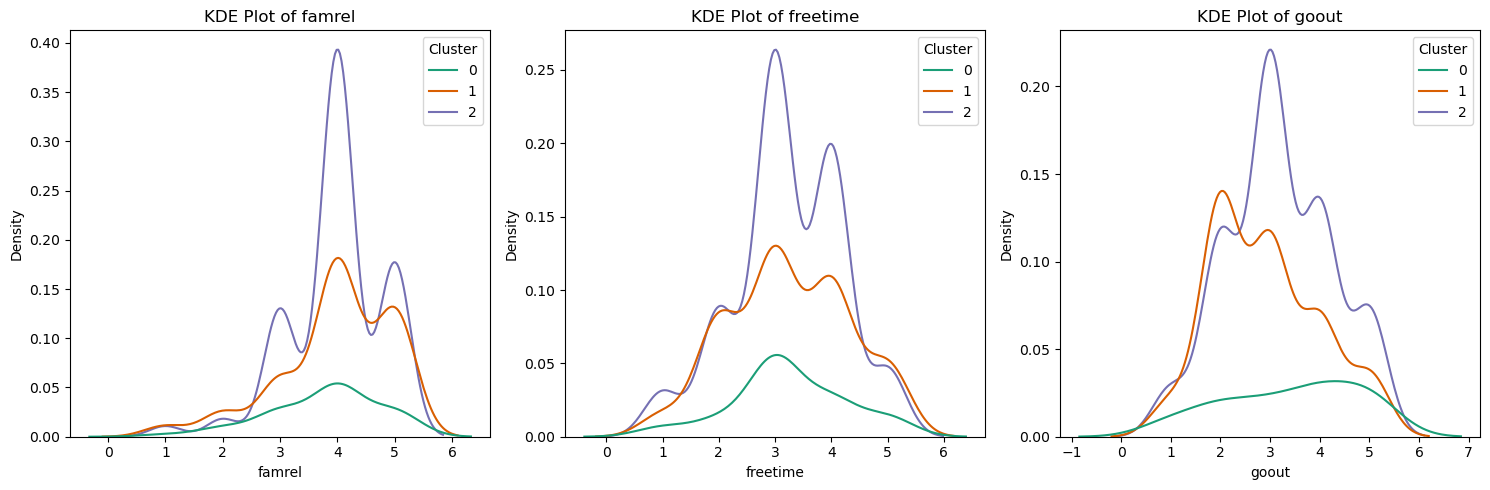

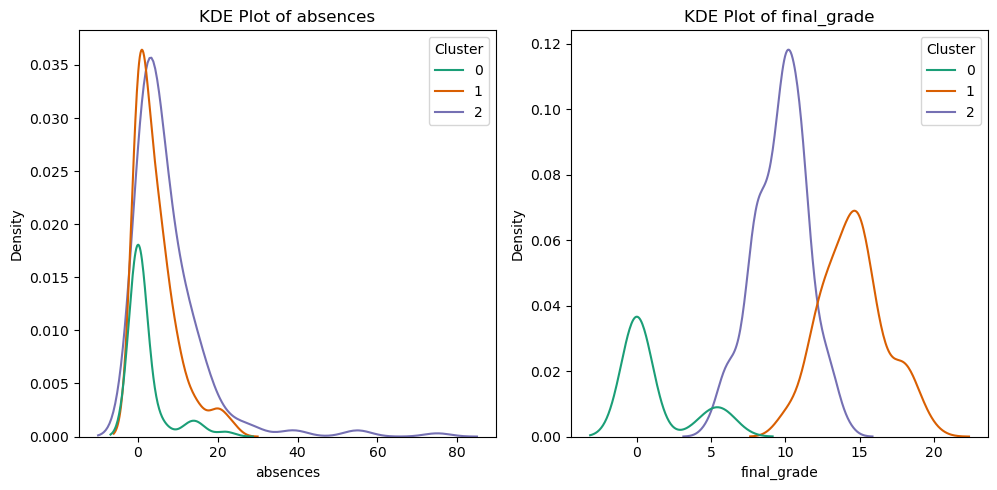

In [515]:
histograms_per_row = 3

# matrix of histograms using seaborn
features = data_kproto.columns[:-1]  # do not plot the 'Cluster' column

for i in range(0, len(features), histograms_per_row):
    plt.figure(figsize=(15, 5))
    for j, feature in enumerate(features[i:i + histograms_per_row]):
        plt.subplot(1, histograms_per_row, j + 1)
#         sns.histplot(data=data_with_clusters, x=feature, hue='Cluster', kde=False, multiple="dodge", alpha=0.7, palette='pastel')
        sns.kdeplot(data=data_kproto, x=feature, hue='Cluster', palette='Dark2', warn_singular=False)
        plt.title(f'KDE Plot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

The most discriminatory feature are *goout* and *final_grade*. 

**goout**

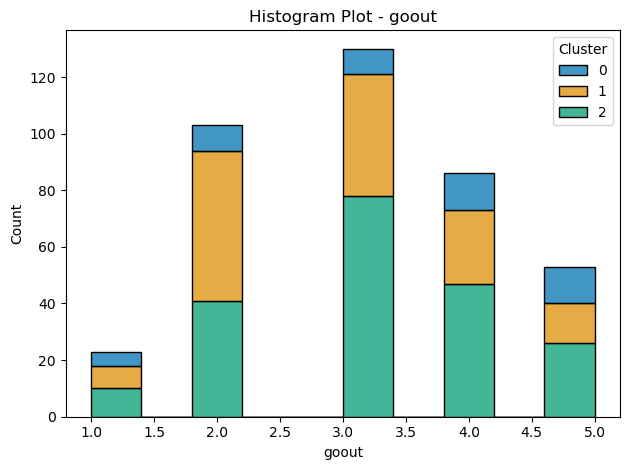

In [520]:
sns.histplot(data=data_kproto, x='goout', multiple='stack', hue = 'Cluster', palette='colorblind')
plt.title('Histogram Plot - goout')
plt.tight_layout()
plt.show()

The above plot shows the distribution of *goout* indicator, separated by cluster. We can see that generally Cluster 2 students go out with friends more, while Cluster 1 students went out less with friends. Cluster 0 students were more evenly spread. 

**final_grade**

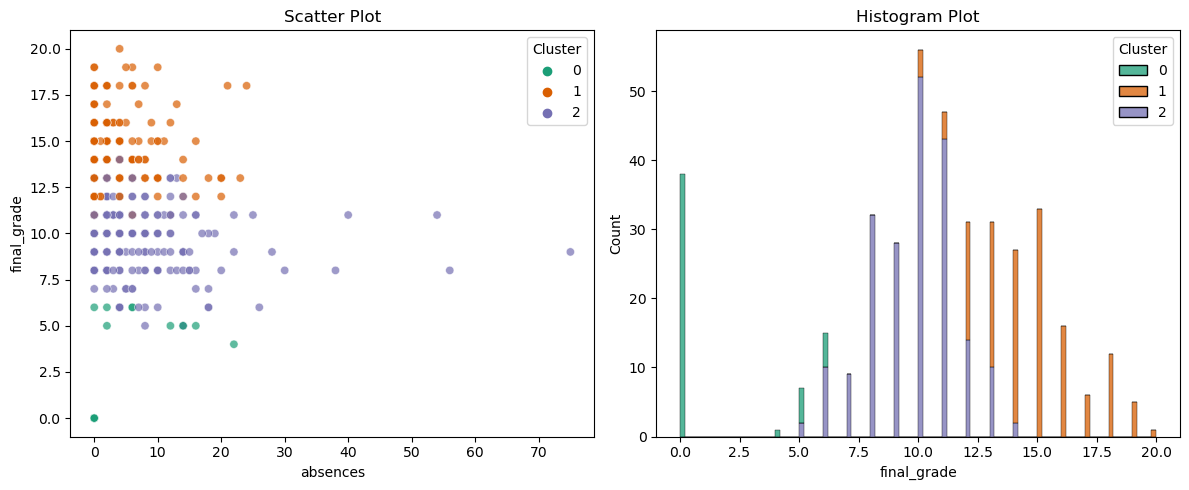

In [516]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot on the left subplot
sns.scatterplot(data=data_kproto, x='absences', y='final_grade', hue='Cluster', alpha= 0.7, palette='Dark2',ax=axs[0])
axs[0].set_title('Scatter Plot')

# hist plot on the right subplot
sns.histplot(data=data_kproto, x='final_grade', hue = 'Cluster', multiple='stack', palette='Dark2',  bins=100,ax=axs[1])

axs[1].set_title('Histogram Plot')

plt.tight_layout()
plt.show()


Above is a scatter plot of *final_grade* against *absences*, coloured by cluster, as well as a histogram plot of *final_grade*, again coloured by cluster. There is clear separation between the clusters when analysing the final grade. Cluster 0 represents students who had a final exam score of 0, or below 7. Cluster 2 represents students who had a final grade between 5 and 14. Cluster 1 students had the highest grades, with final grades above 10.

**Comparison to k-means**

**Does this verify the existence of different clusters in the data?**

There does again appear to be some meaningful differences in the clusters of students in the different groups. The results are similar to above with K-Means, except we now have an extra group, Cluster 2, who seem to represent students that lie more in the middle and less at the extremes. The main differences in the clusters appears to be that Cluster 1 students go out less, and have higher grade distributions, while Cluster 0 students go out more, and have a lower grade distribution, with more 0 grades. The main difference to K-Means is the third group, Cluster 2, who have grades centered more around the average, and do not exhibit a clear tendency to go out less or more than average. In my opinion, the K-Prototypes algorithm has produced more distinct student groups than the K-Means algorithm. 

**Further comparison:**

The Davies-Bouldin Index is a metric used to evaluate the performance of a clustering algorithm. It measures the compactness and separation between clusters in a dataset. Specifically, the Davies-Bouldin Index is calculated by considering pairwise comparisons of clusters. It provides a score where lower values indicate better clustering: lower scores correspond to clusters that are more compact and well-separated.

K-Means score:

In [522]:
round(davies_bouldin_score(data_with_clusters.drop(columns=['Cluster']), data_with_clusters['Cluster']),2)

3.07

K-Prototypes score:

In [523]:
round(davies_bouldin_score(data_kproto.drop(columns=['Cluster']), data_kproto['Cluster']),2)

1.86

**Conclusion**

The Davies-Bouldin Index, explained above, found that K-Prototypes was a better algorithm for clustering this dataset. This result may somewhat verify my point about the modes of the binary and numerical discrete features being a better measure than the means. Also, just from visual inspection of a few plots, it did appear that K-Prototypes found better student clusters in this dataset than K-Means did. 


**Further thoughts**

This dataset has indicators created by grouping numeric data, to create numeric discrete values i.e. bins with certain numeric values. Examples are traveltime and studytime, where values at the extremes in these cases (travel time greater than 1 hour and weekly study time greater than 10 hours) are all grouped into the one category. The data loses some "scale" too, as the distances between the discrete numeric values are often not representative of the real world differences in scale. An example is travel time, where the higher values indicated time intervals much longer than the lower values. While this brings the benefit of possibly making the data easier to interpret, it comes at the cost of losing some information about students at the extremes, which could be very helpful in making predictions/inferences, or learning more about the clusters which exist in the dataset. Another example of this is the *failures* indicator, where we lose information about students with a number of past class failures higher than 4. Having this data may have improved our ability to cluster into meaningful groups. 